# Analyzing Subjects:
<break> </break>
<font size=4>
The Analyzer, along with the classifier class, provide lots of functionality towards analyzing the Cool Neighbors classification data.
</font>

## Aggregating the Classifications

The Analyzer class object requires the extraction and reduction files produced via the Aggregator class. See the Aggregating example for more details.

In [1]:
# Imports
import os
from DataToolkit.Aggregator import Aggregator

# For more details about Aggregating, see the Aggregating example.

# This is the workflow ID and version for the Backyard Worlds: Cool Neighbors project's Launch-0 workflow.
workflow_id = 24299
version = 1.6

# Default names for the CSV files that are exported via Zooniverse's data exports tab.
classifications_csv = "backyard-worlds-cool-neighbors-classifications.csv"
workflows_csv = "backyard-worlds-cool-neighbors-workflows.csv"
config_directory = "Config"
extractions_directory = "Extractions"
reductions_directory = "Reductions"

# Check whether the aggregated files already exist for this workflow and version
aggregator = Aggregator(classifications_csv_filename=classifications_csv, workflow_csv_filename=workflows_csv, config_directory=config_directory, extractions_directory=extractions_directory, reductions_directory=reductions_directory)

if(os.path.exists("{}/question_extractor_workflow_{}_V{}.csv".format(aggregator.extractions_directory, workflow_id, version)) and os.path.exists("{}/question_reducer_workflow_{}_V{}.csv".format(aggregator.reductions_directory, workflow_id, version))):
    print("Aggregated files already exist, skipping aggregation.")
else:
    print("Aggregating...")
    aggregator.aggregateWorkflow(workflow_id=workflow_id, v=version)
    print("Aggregation complete.")

Aggregated files already exist, skipping aggregation.


## Creating the Analyzer
The analyzer will be your all-inclusive tool for working with the panoptes_aggregation results, generated via the Aggregator.

In addition to the analzyer's functionality, it also has a Classifier instance within it which itself has functionality regarding the accuracies of user's and weighting classifications by user accuracy in the candidate selection process.


In [2]:
# Import
from DataToolkit.Analyzer import Analyzer

# Provide the filepaths of the aggregated files
extracted_file = "Extractions/question_extractor_workflow_24299_V1.6.csv"
reduced_file = "Reductions/question_reducer_workflow_24299_V1.6.csv"

# Subject file is optional but highly recommended, as it allows for you to work with subjects offline
# and is generally faster than the online version.
subject_file = "backyard-worlds-cool-neighbors-subjects.csv"
if(subject_file is not None):
    # If an offline analyzer has already been created and saved, you can load it instead of creating it again. You cannot
    # load an online analyzer.
    if (os.path.exists("analyzer.pickle")):
        print("Loading Analyzer...")
        analyzer = Analyzer.load()
    else:
        print("Creating Analyzer...")
        # Providing a subjects_file will default the analyzer to being offline.
        analyzer = Analyzer(extracted_file, reduced_file, subject_file)
else:
    # Not providing a subjects_file will default the analyzer to being online.
    analyzer = Analyzer(extracted_file, reduced_file)

Loading Analyzer...
Loaded Analyzer object from 'analyzer.pickle'


## Getting Analyzer Information

Lots of different types of information can be extracted out of the classification data. Provided below are useful catgegorical examples:

### Getting Subjects and Users
Subject ids, usernames, and user ids are able to be retrieved via the Analyzer as well as their panoptes-client object equivalents.

In [7]:
# Import
from unWISE_verse.Spout import Spout

# Get the valid subject ids from the workflow classifications.
subject_ids = analyzer.getSubjectIDs()
print(f"Valid Subjects:", *subject_ids[0:10], "...\n")

# Get the usernames of the users who have classified.
usernames = analyzer.getUniqueUserIdentifiers(user_identifier="username")
print(f"Usernames:", *usernames[0:10], "...\n")

# Get the user ids of the users who have classified.
# include_logged_out_users must be false since logged-out users do not have user ids.
user_ids = analyzer.getUniqueUserIdentifiers(include_logged_out_users=False, user_identifier="user id")
print(f"User ids:", *user_ids[0:10], "...\n")


# Get the top usernames (two modes: percentile or classification threshold).
top_usernames = analyzer.getTopUsernames(classification_threshold=None, percentile=98)
print(f"Top usernames: {top_usernames}\n")

# Login to Zooniverse with Spout to access the next two functions.
# You will need to log in to Spout to use these functions or use online mode.
login = Spout.requestLogin()
Spout.loginToZooniverse(login)
print()
# Get the subject object for a specific subject. Not disabled for offline mode, but you will need to log in to Spout
# to get the subject object.
subject_object = analyzer.getSubject(subject_ids[0])
print(f"Subject object for subject {subject_ids[0]}: {subject_object}\n")

# Get the user object for a specific user. Not disabled for offline mode, but you will need to log in to Spout
# to get the user object.
user_object = analyzer.getUser(usernames[0])
print(f"User object for user {usernames[0]}: {user_object}\n")

# Gets the user objects of the top users (two modes: percentile or classification threshold).
top_user_objects = analyzer.getTopUsers(classification_threshold=None, percentile=98)
print(f"Top user objects: {top_user_objects}\n")

Valid Subjects: 89099782 89099844 89099869 89100067 89100074 89100144 89100157 89100208 89100248 89100284 ...

Usernames: robbinsg NoahSchapera.9 pga99 not-logged-in-f6496faa335471e8e9d4 Albionaa Night-Vega not-logged-in-99db418729914db69dc7 Herakles Marcossilva vinnyzo ...

User ids: 2129944.0 2475288.0 1728334.0 nan 2161413.0 2335011.0 1572079.0 1589918.0 2624692.0 2582694.0 ...

Top usernames: ['ConC', 'Vidar87', 'LizzethRuiz', 'Rattus', 'pga99', 'Borvo', 'BlueWhovian', 'VinodThakur', 'SAlexandrov', 'chulej', 'ShyBay', 'Marcossilva', 'Rosie_Oliver', 'Geert_D', 'nilium', 'wangqintao', 'pathfinder7567', 'ARTEM1', 'BruceHorlyck', 'eantonio2023', 'Barbalbero', 'Herakles', 'jcstew', 'graham_d', 'shocko61', 'Sharp88', 'leelaht', 'canopus228', 'RoksolanaKot', 'Harborist', 'Knightrider95', 'malcolmf', 'EllieSparke', 'Gronagor', 'chrostek', 'thorsteinn', 'Kennycavanaugh', 'MartinKb', 'jiipee', 'Naoufel67', 'Jesskantine', 'BLGoodwin', 'autumnwisp', 'Jose_Campos', 'MrAgent99', 'kiri2ll']

Logi

### Number of Classifications

These functions pertain to getting the total number of classifications of all users, or some specific subset of users.

In [6]:
# Get the total number of classifications in the aggregated files.
print(f"Number of classifications: {analyzer.getTotalClassifications()}\n")

# Get the total number of classifications for a subjects which have at least n classifications.
n = 5
print(f"Number of classifications for subjects with at least {n} classifications: {analyzer.getSubsetOfTotalClassifications(minimum_subject_classification_count=5)}\n")

# Get the total number of classifications done by a specific user.
user_classification_count = analyzer.getTotalClassificationsByUser(usernames[0])
print(f"Total classifications by user {usernames[0]}: {user_classification_count}\n")

# Get the total number of classifications done by the top users (two modes: percentile or classification threshold).
top_users_classification_count = analyzer.getTotalClassificationsByTopUsers(classification_threshold=None, percentile=98)
print(f"Total classifications by top users: {top_users_classification_count}\n")

Number of classifications: 346646

Number of classifications for subjects with at least 5 classifications: 346496

Total classifications by user robbinsg: 120

Total classifications by top users: 220892



### Plotting Classifications
Plot classification data in a variety of different and useful ways.

Plotting classification distribution for all valid subjects...



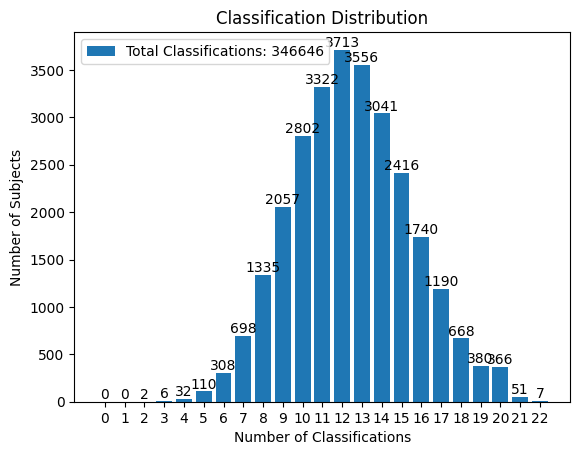

In [5]:
# Plot the classification distribution for all subjects.
total_subject_count = 27800
print("Plotting classification distribution for all valid subjects...\n")
analyzer.plotClassificationDistribution(total_subject_count=total_subject_count, title="Classification Distribution")